Dự đoán nhãn của điểm mới: 1.0


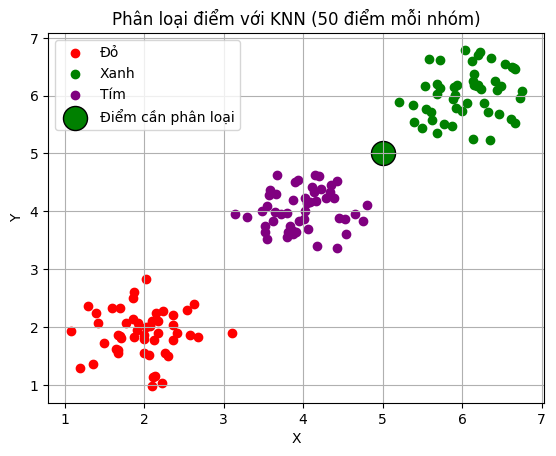

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 1. Tạo dữ liệu gồm 50 điểm cho mỗi nhóm

# Nhóm ĐỎ
red_points = np.random.normal(loc=[2, 2], scale=0.4, size=(50, 2))
red_labels = np.zeros(50)

# Nhóm XANH
green_points = np.random.normal(loc=[6, 6], scale=0.4, size=(50, 2))
green_labels = np.ones(50)

# Nhóm Tím
purple_points = np.random.normal(loc=[4, 4], scale=0.4, size=(50, 2))
purple_labels = np.full(50, 2)

# Gộp toàn bộ dữ liệu
X = np.vstack((red_points, green_points, purple_points))
y = np.concatenate((red_labels, green_labels, purple_labels))

# 2. Huấn luyện mô hình KNN
# k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# 3. Dự đoán 1 điểm bất kỳ

new_point = np.array([[5, 5]])
pred = knn.predict(new_point)
print("Dự đoán nhãn của điểm mới:", pred[0])

# 4. Vẽ biểu đồ

plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Đỏ')
plt.scatter(green_points[:, 0], green_points[:, 1], color='green', label='Xanh')
plt.scatter(purple_points[:, 0], purple_points[:, 1], color='purple', label='Tím')

# Vẽ điểm mới
colors = ['red', 'green', 'purple']
plt.scatter(new_point[0, 0], new_point[0, 1],
            color=colors[int(pred[0])],
            edgecolor='black',
            s=300,
            label='Điểm cần phân loại')

plt.legend()
plt.title("Phân loại điểm với KNN (50 điểm mỗi nhóm)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


In [83]:
#Dùng Scikit-learn để thử nghiệm
import numpy as np
from tensorflow.keras.datasets import mnist

# Tải dữ liệu MNIST bằng Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Kết hợp tập huấn luyện và kiểm tra để có một tập dữ liệu duy nhất (giống đầu ra của fetch_openml)
X = np.vstack([X_train, X_test])
y = np.concatenate([y_train, y_test])

# Chuyển đổi dữ liệu sang dạng vector và chuẩn hóa về [0,1]
X = X.reshape(-1, 28 * 28).astype("float32") / 255.0

print("Kích thước X:", X.shape)
print("Kích thước y:", y.shape)

Kích thước X: (70000, 784)
Kích thước y: (70000,)


In [84]:
#Tải bộ dữ liệu MNIST
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)
#KNN yêu cầu dữ liệu dạng vector, nên ta flatten ảnh 28×28 → 784
# Chuyển sang dạng float và chuẩn hóa về [0,1]
X_train = X_train.reshape(60000, 784).astype("float32") / 255.0
X_test  = X_test.reshape(10000, 784).astype("float32") / 255.0

print("Train:", X_train.shape)
print("Test :", X_test.shape)

#Huấn Luyện Mô Hình
from sklearn.neighbors import KNeighborsClassifier

# Tạo mô hình KNN với K = 3
knn = KNeighborsClassifier(n_neighbors=3)

# Huấn luyện
print("Đang huấn luyện KNN (có thể hơi lâu)...")
knn.fit(X_train, y_train)

print("Huấn luyện xong!")

#Dự đoán và đánh giá
from sklearn.metrics import accuracy_score, classification_report

y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Độ chính xác KNN:", acc)

print("\nBáo cáo phân loại:\n")
print(classification_report(y_test, y_pred))

Train: (60000, 28, 28) (60000,)
Test : (10000, 28, 28) (10000,)
Train: (60000, 784)
Test : (10000, 784)
Đang huấn luyện KNN (có thể hơi lâu)...
Huấn luyện xong!
Độ chính xác KNN: 0.9705

Báo cáo phân loại:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



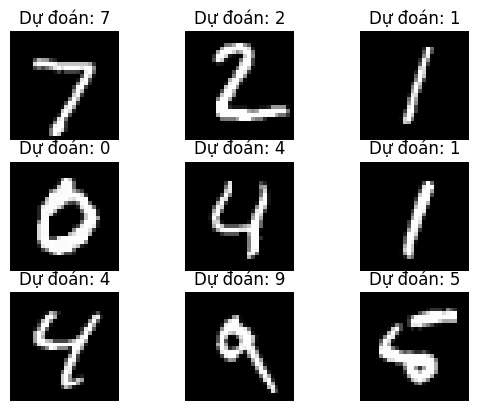

In [85]:
#Ví dụ minh họa vài ảnh MNIST và dự đoán
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap="gray")
    plt.title("Dự đoán: " + str(y_pred[i]))
    plt.axis("off")

In [86]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import joblib

from tensorflow.keras.datasets import mnist

#  tải MNIST bằng Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Chuyển 28x28 → vector 784 để dùng KNN
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test  = X_test.reshape(-1, 28*28) / 255.0

print("Train:", X_train.shape)
print("Test:", X_test.shape)

X = X_train
y = y_train

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Lưu mô hình
joblib.dump(model, "mnist_knn.pkl")
print("Đã lưu mô hình mnist_knn.pkl")


Train: (60000, 784)
Test: (10000, 784)
Đã lưu mô hình mnist_knn.pkl


In [100]:
#Tải ảnh lên
from google.colab import files
uploaded = files.upload()


Saving So1.jpg to So1.jpg


In [101]:
# Load mô hình đã huấn luyện
import joblib
model = joblib.load("mnist_knn.pkl")


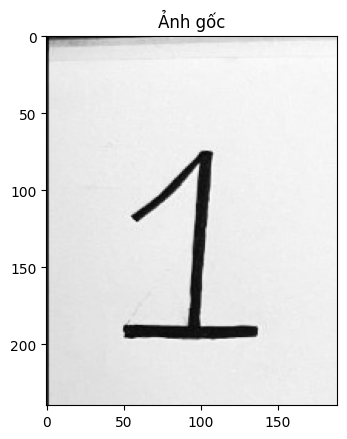

In [102]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = list(uploaded.keys())[0]   # tên file vừa upload

# Đọc ảnh grayscale
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Hiển thị ảnh gốc
plt.imshow(img, cmap='gray')
plt.title("Ảnh gốc")
plt.show()

# Resize về 28×28
img_resized = cv2.resize(img, (28, 28))

# MNIST là chữ sáng nền đen → đảo màu
img_resized = cv2.bitwise_not(img_resized)

# Chuẩn hóa và reshape
img_norm = img_resized.astype("float32") / 255.0
img_flat = img_norm.reshape(1, 784)


In [104]:
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml


# 1. Train KNN từ MNIST

print("Đang tải MNIST...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.uint8)
y = mnist.target.astype(int)

print("Đang train KNN...")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)


# 2. Tiền xử lý ảnh thực tế

def preprocess(img_path):
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError("Không tìm thấy ảnh!")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Làm mượt nhẹ (cho nét mực đậm)
    gray = cv2.GaussianBlur(gray, (3,3), 0)

    # Dùng adaptive threshold để giữ nét số thật tốt
    th = cv2.adaptiveThreshold(
        gray, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV,
        41, 8
    )

    contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        raise Exception("Không tìm thấy số!")

    c = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)
    digit = th[y:y+h, x:x+w]

    # Resize chuẩn MNIST
    digit = cv2.resize(digit, (20, 20), interpolation=cv2.INTER_AREA)

    # Padding thành 28x28
    canvas = np.zeros((28, 28), dtype=np.uint8)
    canvas[4:24, 4:24] = digit

    return canvas.reshape(1, -1)


# 3. Dự đoán
img_file = "So1.jpg"   # ---- ĐÃ SỬA ----
X_test = preprocess(img_file)
pred = knn.predict(X_test)

print("Dự đoán:", pred[0])


Đang tải MNIST...
Đang train KNN...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Dự đoán: 1
